# ***Capstone 2 - New York City TLC***

Project Capstone ini bertujuan melakukan data analisis dari suatu case bisnis, analisis dilakukan dengan serangkaian eksplorasi data yang didasarkan pada kebutuhan dan tantangan bisnis, diharapkan hasil analisis data tersebut, dapat menemukan suatu insight yang membantu perusahaan / bisnis dalam meningkatkan performanya.

**Farid Hakimil (JCDS Purwadhika 2302)**

# **Business Problem Statement**

Sebagai salah satu kota dengan populasi yang terbesar, Dikota New York kita bisa mendapati ratusan hingga ribuan perjalanan taxi setiap harinya. Taxi menjadi salah satu kebutuhan dari masyarakat New York guna memenuhi kebutuhan mereka dalam hal transportasi privat. Kebutuhan tersebut menjadi salah satu alasan dilakukan analisis lebih lanjut, perihal bagaimana perusahaan mampu untuk hadir dalam memenuhi kebutuhan masyarakat New York. Aksi perusahaan tersebut bertujuan untuk mendapatkan *engagement* perusahaan dengan customer, sehingga pada akhirnya perusahaan taxi bisa mendapatkan *benefit* untuk kelangsungan bisnisnya.

Berdasarkan kebutuhan tsb diatas, kami mencoba untuk menyediakan rekomendasi bagaimana cara meningkatkan pendapatan perusahaan, yakni dengan :

1. Bagaimana meningkatkan pendapatan drivers / perusahaan?

2. Bagaimana strategi operasional perusahaan?

# **Objective of Analysis**

Untuk menjawab kebutuhan bisnis diatas, kami merumuskan beberapa pendekatan yang dapat menjadi dasar untuk mengambil keputusan / strategi perusahaan :

1. Mencari tahu lokasi terbaik dikota New York yang tinggi kebutuhan taxi 

2. Mencari tahu kapan waktu kebutuhan taxi meningkat

3. Mencari tahu hal apa saja yang dapat menjadi alasan bagi customer untuk tetap setia menggunakan taxi

# **Data Preparation**

### **Import library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set()

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

## **1. Load Dataset**

In [2]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00


### **1.1. Additional Data --> LocationID**

**Catatan :**

- Informasi dan data tambahan terkait NYC TLC dapat ditelusuri dari tautan berikut :

    https://www.nyc.gov/site/tlc/about/about-tlc.page

- Terkait dengan keterangan atas kode (Pick Up dan Drop Off ID) diperlukan tambahan data, yang didapat dari tautan berikut :

    https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv

In [3]:
df_loc = pd.read_csv('taxi_zone_lookup.csv').rename(columns={'LocationID' : 'PULocationID'})
df_loc

,PULocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [4]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

### **1.2. Merge Data**

In [5]:
df = pd.merge(left= df, right= df_loc, how= 'left',  on= 'PULocationID').rename(columns={'Borough':'pu_borough','Zone':'pu_zone'}).drop(columns='service_zone', axis = 1)

df = df.join(df_loc, lsuffix= '_1', rsuffix= '_2', how= 'right', on= 'DOLocationID').rename(columns={'Borough':'do_borough','Zone':'do_zone'}).drop(columns=['PULocationID_2','service_zone'], axis = 1)
df.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID_1,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EWR,Newark Airport
834.0,2.0,2023-01-01 16:08:11,2023-01-01 17:02:53,N,5.0,65.0,1,3.0,14.81,110.0,0.0,0.0,22.20,0.00,NaN,1.0,133.20,1.0,2.0,0.0,Brooklyn,Downtown Brooklyn/MetroTech,Queens,Jamaica Bay
1445.0,2.0,2023-01-02 08:57:41,2023-01-02 09:39:53,N,3.0,166.0,1,3.0,26.94,121.7,0.0,0.0,33.94,13.75,NaN,0.3,169.69,1.0,1.0,0.0,Manhattan,Morningside Heights,Queens,Jamaica Bay


## <hr>

## **2. EDA (Exploratory Data Analysis)**

In [6]:
print(f'row and columns : {df.shape}')

pd.DataFrame({
    'data_name'     : df.columns.values,
    'data_type'     : df.dtypes.values,
    'data_missing'  : df.isna().sum().values,
    'n_unique'      : df.nunique().values,
    'sample_unique' : [df[x].unique() for x in df.columns]})

row and columns : (67986, 24)


,data_name,data_type,data_missing,n_unique,sample_unique
0,VendorID,float64,17,2,"[nan, 2.0, 1.0]"
1,lpep_pickup_datetime,object,17,66346,"[nan, 2023-01-01 16:08:11, 2023-01-02 08:57:41..."
2,lpep_dropoff_datetime,object,17,66286,"[nan, 2023-01-01 17:02:53, 2023-01-02 09:39:53..."
3,store_and_fwd_flag,object,4323,2,"[nan, N, Y]"
4,RatecodeID,float64,4323,6,"[nan, 5.0, 3.0, 1.0, 4.0, 2.0, 99.0]"
5,PULocationID_1,float64,17,226,"[nan, 65.0, 166.0, 130.0, 75.0, 226.0, 244.0, ..."
6,DOLocationID,int64,0,265,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
7,passenger_count,float64,4323,10,"[nan, 3.0, 4.0, 1.0, 5.0, 0.0, 2.0, 6.0, 7.0, ..."
8,trip_distance,float64,17,1813,"[nan, 14.81, 26.94, 14.54, 26.76, 14.49, 41.74..."
9,fare_amount,float64,17,2512,"[nan, 110.0, 121.7, 118.2, 114.0, 97.2, 123.8,..."


### **2.1. Data Details**

#### **2.1.1 VendorID**

a code indicating the provider associated with the trip record

- 1. Creative Mobile Technologies, LLC

- 2. **VeriFone Inc** (majority)

In [7]:
df['VendorID'].value_counts()

VendorID
2.0    58670
1.0     9299
Name: count, dtype: int64

#### **2.1.2 lpep_pickup_datetime**

- The date and time when the meter was engaged

- The data for analysis is data for **January 2023**

#### **2.1.3 lpep_dropoff_datetime**

- The date and time when the meter was disengaged

#### **2.1.4 store_and_fwd_flag**

- This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, 

- aka “store and forward,” because the vehicle did not have a connection to the server.

- Y = store and forward trip

- N = not a store and forward trip

In [8]:
df['store_and_fwd_flag'].isna().sum()

4323

In [9]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    63355
Y      308
Name: count, dtype: int64

#### **2.1.5 RatecodeID**

The final rate code is in effect at the end of the trip.

1 = Standard rate

2 = JFK

3 = Newark

4 = Nassau or Westchester

5 = Negotiated fare

6 = Group ride

In [10]:
df['RatecodeID'].isna().sum()

4323

In [11]:
df['RatecodeID'].value_counts().sort_index()

RatecodeID
1.0     61967
2.0       158
3.0        24
4.0         5
5.0      1499
99.0       10
Name: count, dtype: int64

**Note** : There is anomali for ratecodeID : 99

#### **2.1.6 PULocationID**

TLC Taxi Zone in which the taximeter was engaged

In [12]:
df['PULocationID_1'].nunique()

226

#### **2.1.7 DOLocationID**

TLC Taxi Zone in which the taximeter was disengaged

In [13]:
df['DOLocationID'].nunique()

265

#### **2.1.8 passenger_count**

- The number of passengers in the vehicle.

- This is a driver-entered value.

In [14]:
df['passenger_count'].value_counts().sort_index()

passenger_count
0.0      335
1.0    54109
2.0     5076
3.0      952
4.0      364
5.0     1768
6.0     1052
7.0        4
8.0        2
9.0        1
Name: count, dtype: int64

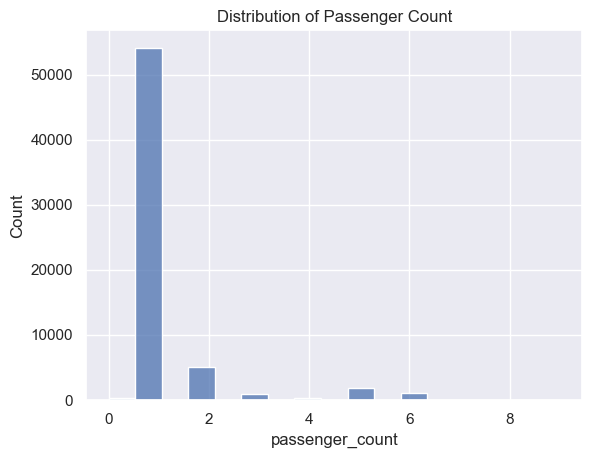

In [15]:
sns.histplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

#### **2.1.9 trip_distance**

The elapsed trip distance in miles was reported by the taximeter

In [16]:
df['trip_distance'].describe()

count     67969.000000
mean          8.100345
std         586.146281
min           0.000000
25%           1.110000
50%           1.840000
75%           3.200000
max      120098.840000
Name: trip_distance, dtype: float64

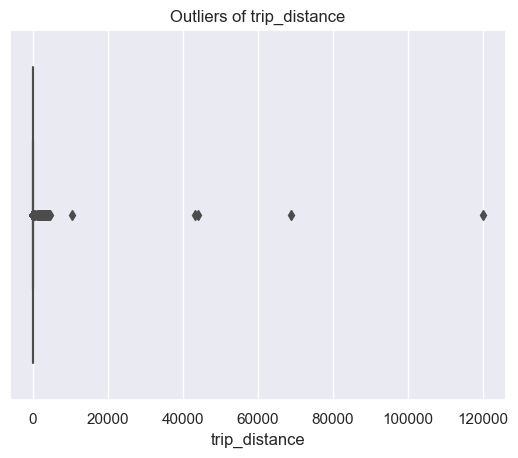

In [17]:
sns.boxplot(df, x='trip_distance')
plt.title('Outliers of trip_distance')
plt.show()

#### **2.1.10 fare_amount**

- The time-and-distance fare is calculated by the meter. 

- Extra Miscellaneous extras and surcharges.

- Currently, this only includes the $0.50 and $1 rush hour and overnight charges

In [18]:
df['fare_amount'].describe()

count    67969.000000
mean        16.436349
std         12.883636
min        -70.000000
25%          9.300000
50%         13.310000
75%         19.800000
max        490.000000
Name: fare_amount, dtype: float64

#### **2.1.11 extra**

The TLC created the Taxi Improvement Fund (TIF) to support drivers of accessible medallion taxicabs, to ensure that all customers have equitable access to taxi transportation services

In [19]:
df['extra'].value_counts()

extra
 0.00     40551
 2.50     12088
 1.00     11100
 2.75      1574
 5.00       828
 0.50       611
 5.25       496
 7.50       287
 3.75       220
 6.00        80
 3.25        52
-2.50        47
-1.00        31
-0.50         2
 5.50         1
 12.50        1
Name: count, dtype: int64

#### **2.1.12 mta_tax**

$0.50 MTA tax that is automatically triggered based on the metered rate in use

In [20]:
df['mta_tax'].value_counts()

mta_tax
 0.50    53035
 1.50     9026
 0.00     5717
-0.50      165
 1.00       25
 2.75        1
Name: count, dtype: int64

#### **2.1.13 tip_amount**

- This field is automatically populated for credit card tips. 

- **Cash tips are not included**

- A numeric code signifying how the passenger paid for the trip :

    1 = Credit card

    2 = Cash

    3 = No charge

    4 = Dispute

    5 = Unknown

    6 = Voided trip

In [21]:
df.groupby(by='payment_type')['tip_amount'].count()

payment_type
1.0    40565
2.0    22530
3.0      472
4.0       94
5.0        2
Name: tip_amount, dtype: int64

In [22]:
df[df['payment_type'] != 1]['tip_amount'].nunique()

991

#### **2.1.14 tolls_amount**

The total amount of all tolls paid in the trip

In [23]:
df['tolls_amount'].describe()

count    67969.000000
mean         0.162992
std          1.060729
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         36.050000
Name: tolls_amount, dtype: float64

#### **2.1.15 ehail_fee**

#### **2.1.16 improvement_surcharge**

- $0.30 improvement surcharge assessed on hailed trips at the flag drop.

- The improvement surcharge began being levied in 2015

In [24]:
df['improvement_surcharge'].value_counts()

improvement_surcharge
 1.0    63666
 0.3     3948
 0.0      181
-1.0      166
-0.3        8
Name: count, dtype: int64

#### **2.1.17 total_amount**

- The total amount charged to passengers. 

- Does not include cash tips

In [25]:
df['total_amount'].describe()

count    67969.000000
mean        21.611721
std         14.880867
min        -71.500000
25%         12.900000
50%         17.830000
75%         26.040000
max        491.000000
Name: total_amount, dtype: float64

#### **2.1.18 payment_type**

- A numeric code signifying how the passenger paid for the trip :

    1 = Credit card

    2 = Cash

    3 = No charge

    4 = Dispute

    5 = Unknown

    6 = Voided trip

#### **2.1.19 trip_type**

A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based
on the metered rate in use but can be altered by the
driver.

1 = Street-hail

2 = Dispatch

In [26]:
df['trip_type'].value_counts()

trip_type
1.0    62284
2.0     1369
Name: count, dtype: int64

#### **2.1.20 congestion_surcharge**

### **2.2. Other Info**

- $3.00 initial charge.

- Plus 70 cents per 1/5 mile when traveling above 12mph or per 60 seconds in slow traffic or when the vehicle is stopped.

- Plus 50 cents MTA State Surcharge for all trips that end in New York City or Nassau, Suffolk, Westchester, Rockland, Dutchess, Orange or Putnam Counties.

- Plus $1.00 Improvement Surcharge.

- Plus $1.00 overnight surcharge 8pm to 6am.

- Plus $2.50 rush hour surcharge from 4pm to 8pm on weekdays, excluding holidays.

- Plus New York State Congestion Surcharge of $2.50 (Yellow Taxi) or $2.75 (Green Taxi and FHV) or 75 cents (any shared ride) for all trips that begin, end or pass through Manhattan south of 96th Street.

- Plus tips and any tolls.

- There is no charge for extra passengers, luggage or bags, or paying by credit card.

- The on-screen rate message should read: "Rate #01 – Standard City Rate."

- Make sure to always take your receipt.

## <hr>

## **3. Data Prepocessing**

### **3.1 Drop Unnecessary Columns**

***vendorID***
- Kolom ***vendorID*** hanya menampilkan data provider data, hal ini tidak berkorelasi dalam analisa

***store_and_fwd_flag***

- Kolom ***store_and_fwd_flag*** dimaksudkan untuk menandai rekaman suatu perjalanan sudah dicatatkan dalam memori kendaraan atau belum.
- Hal ini berlaku untuk argometer yang tidak terkoneksi dengan server
- Terdapat 4324 baris yang kosong
- Menurut saya kolom ***store_and_fwd_flag*** bukan termasuk dalam data yang diperlukan untuk analisa

***ehail_fee :***

- Kolom ***ehail_fee*** berdasarkan domain knowledge adalah biaya yang dikeluarkan atas panggilan taxi secara online 
- Value kolom ***ehail_fee*** semua adalah 0, shg kolom ehail_fee dimungkinkan untuk dihapuskan

In [27]:
df.drop(columns= ['VendorID','ehail_fee','store_and_fwd_flag'], axis= 1, inplace= True)
df.head(1)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID_1,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EWR,Newark Airport


### **3.2 Change Columns Name**

In [28]:
df = df.rename(columns={
                        'lpep_pickup_datetime'  : 'pu_datetime', 
                        'lpep_dropoff_datetime' : 'do_datetime',
                        'RatecodeID'            : 'ratecode',
                        'PULocationID_1'        : 'pu_loc',
                        'DOLocationID'          : 'do_loc',
                        'improvement_surcharge' : 'improve_sur',
                        'congestion_surcharge'  : 'congest_sur',
                        'Borough'               : 'borough',
                        'Zone'                  : 'zone'
    })
df.head(1)

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone
NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EWR,Newark Airport


### **3.3 Handling Missing Value**

In [29]:
df.isna().sum()

pu_datetime          17
do_datetime          17
ratecode           4323
pu_loc               17
do_loc                0
passenger_count    4323
trip_distance        17
fare_amount          17
extra                17
mta_tax              17
tip_amount           17
tolls_amount         17
improve_sur          17
total_amount         17
payment_type       4323
trip_type          4333
congest_sur        4323
pu_borough           62
pu_zone             152
do_borough          426
do_zone            1573
dtype: int64

#### **3.3.1 ratecode**

In [30]:
df['ratecode'].isna().sum()

4323

In [31]:
df['ratecode'].value_counts().sort_index()

ratecode
1.0     61967
2.0       158
3.0        24
4.0         5
5.0      1499
99.0       10
Name: count, dtype: int64

In [32]:
df[df['ratecode'] == 99]

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone
1084.0,2023-01-01 19:44:13,2023-01-01 19:58:30,99.0,150.0,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Queens,Corona
35975.0,2023-01-19 01:07:59,2023-01-19 01:17:19,99.0,90.0,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Manhattan,Flatiron,Bronx,East Concourse/Concourse Village
14125.0,2023-01-08 11:36:41,2023-01-08 12:14:59,99.0,61.0,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0,Brooklyn,Crown Heights North,Bronx,East Tremont
2174.0,2023-01-02 16:39:05,2023-01-02 17:31:42,99.0,73.0,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0,Queens,East Flushing,Queens,Elmhurst/Maspeth
9055.0,2023-01-05 20:33:45,2023-01-05 22:46:41,99.0,14.0,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0,Brooklyn,Bay Ridge,Queens,Howard Beach
29711.0,2023-01-15 17:52:52,2023-01-15 22:11:55,99.0,150.0,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Queens,Howard Beach
37691.0,2023-01-19 17:16:59,2023-01-19 22:29:53,99.0,265.0,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0,NaN,Outside of NYC,Queens,Howard Beach
42432.0,2023-01-21 20:29:58,2023-01-22 02:59:25,99.0,150.0,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Queens,Howard Beach
29143.0,2023-01-15 13:51:42,2023-01-15 14:37:38,99.0,108.0,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0,Brooklyn,Gravesend,Bronx,Parkchester
45204.0,2023-01-23 13:45:11,2023-01-23 23:36:42,99.0,244.0,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0,Manhattan,Washington Heights South,Manhattan,West Village


**NOTE**

The assumption of changing the value 99 to 1 are :

- pu_borough        : Brooklyn, Queens, Manhattan, Outside of NYC

- passenger_count   : 1

- fare_amount       : high value

**Change the Value**

In [33]:
df['ratecode'].replace({99 : 1}, inplace= True)

**Fill in missing values**

In [34]:
# check with skew of ratecode
skew_rate = df['ratecode'].skew()

# check with kurtosis of ratecode
kurt_rate = df['ratecode'].kurtosis()

display(skew_rate, kurt_rate)

6.1937840757863905

36.57168190844967

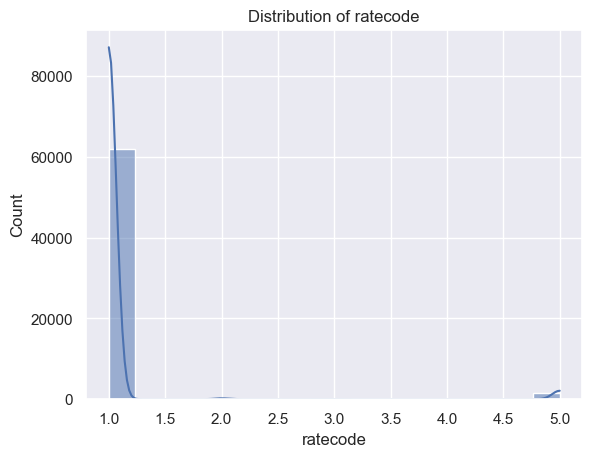

In [35]:
# check with histogram of ratecode
sns.histplot(data=df, x='ratecode', kde=True)

plt.title('Distribution of ratecode')
plt.show()

In [36]:
# Histogram data ratecode --> not normally distributed : Use median
df['ratecode'].fillna(df['ratecode'].median(), inplace=True)

#### **3.3.2 passenger_count**

In [37]:
df['passenger_count'].isna().sum()

4323

In [38]:
df['passenger_count'].value_counts().sort_index()

passenger_count
0.0      335
1.0    54109
2.0     5076
3.0      952
4.0      364
5.0     1768
6.0     1052
7.0        4
8.0        2
9.0        1
Name: count, dtype: int64

**NOTE :** 

The assumption of changing the value 0 to 1 is minimum passenger = 1

In [39]:
df['passenger_count'].replace({0 : 1}, inplace= True)

In [40]:
# check with skew of passenger_count
skew_rate = df['passenger_count'].skew()

# check with kurtosis of passenger_count
kurt_rate = df['passenger_count'].kurtosis()

display(skew_rate, kurt_rate)

3.542326223203822

12.097469791908695

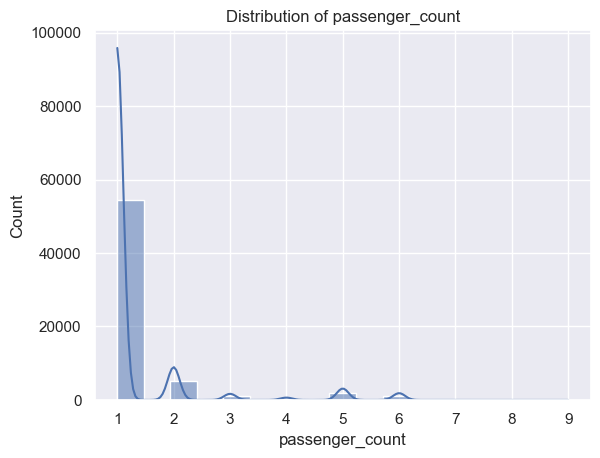

In [41]:
# check with histogram of passenger_count
sns.histplot(data=df, x='passenger_count', kde=True);

plt.title('Distribution of passenger_count')
plt.show()

In [42]:
# Histogram data passenger_count --> not normally distributed : Use median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

#### **3.3.3 payment_type**

In [43]:
df['payment_type'].value_counts()

payment_type
1.0    40565
2.0    22530
3.0      472
4.0       94
5.0        2
Name: count, dtype: int64

In [44]:
# check with skew of payment_type
skew_rate = df['payment_type'].skew()

# check with kurtosis of payment_type
kurt_rate = df['payment_type'].kurtosis()

display(skew_rate, kurt_rate)

0.8710394736919822

-0.07637860837717003

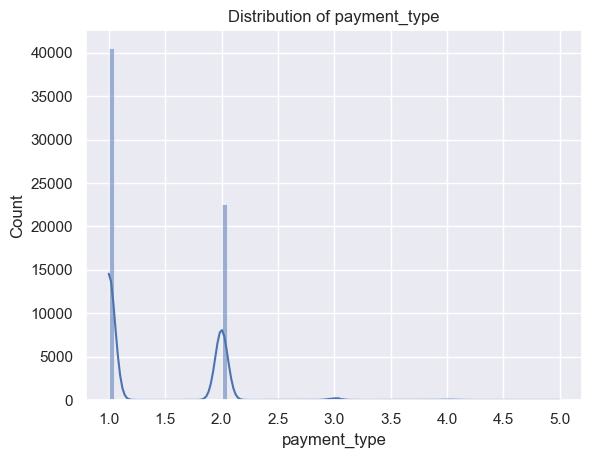

In [45]:
# check with histogram of payment_type
sns.histplot(data=df, x='payment_type', kde=True);

plt.title('Distribution of payment_type')
plt.show()

In [46]:
# Histogram data payment_type --> not normally distributed : Use median
df['payment_type'].fillna(df['payment_type'].median(), inplace=True)

In [47]:
df.isna().sum()

pu_datetime          17
do_datetime          17
ratecode              0
pu_loc               17
do_loc                0
passenger_count       0
trip_distance        17
fare_amount          17
extra                17
mta_tax              17
tip_amount           17
tolls_amount         17
improve_sur          17
total_amount         17
payment_type          0
trip_type          4333
congest_sur        4323
pu_borough           62
pu_zone             152
do_borough          426
do_zone            1573
dtype: int64

#### **3.3.4 trip_type**

In [48]:
df['trip_type'].value_counts()

trip_type
1.0    62284
2.0     1369
Name: count, dtype: int64

In [49]:
# check with skew of trip_type
skew_rate = df['trip_type'].skew()

# check with kurtosis of trip_type
kurt_rate = df['trip_type'].kurtosis()

display(skew_rate, kurt_rate)

6.596970027408408

41.521318156188215

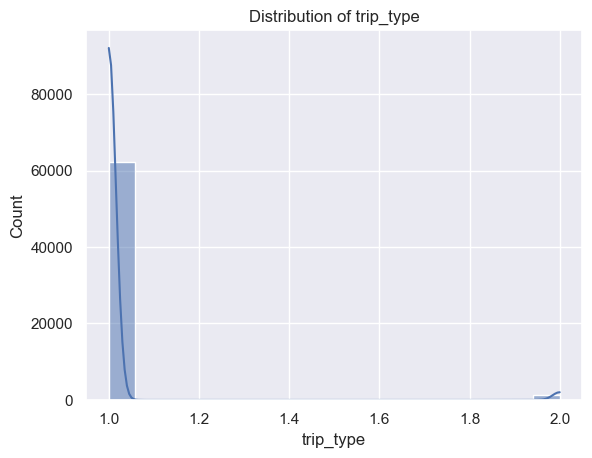

In [50]:
# check with histogram of trip_type
sns.histplot(data=df, x='trip_type', kde=True);

plt.title('Distribution of trip_type')
plt.show()

In [51]:
# Histogram data trip_type --> not normally distributed : Use median
df['trip_type'].fillna(df['trip_type'].median(), inplace=True)

#### **3.3.5 congest_sur**

In [52]:
df['congest_sur'].value_counts()

congest_sur
 0.00    46773
 2.75    16871
 2.50       16
-2.75        3
Name: count, dtype: int64

In [53]:
df[df['congest_sur'] == -2.75]

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone
36900.0,2023-01-19 13:49:39,2023-01-19 14:40:05,1.0,43.0,23,1.0,24.14,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.25,2.0,1.0,-2.75,Manhattan,Central Park,Manhattan,Bloomingdale
33359.0,2023-01-17 18:57:59,2023-01-17 19:04:04,1.0,75.0,236,1.0,0.93,-7.9,-2.5,-0.5,0.0,0.0,-1.0,-14.65,3.0,1.0,-2.75,Manhattan,East Harlem South,Manhattan,Upper East Side South
36269.0,2023-01-19 08:25:38,2023-01-19 08:28:18,1.0,236.0,236,2.0,0.36,-4.4,0.0,-0.5,0.0,0.0,-1.0,-8.65,3.0,1.0,-2.75,Manhattan,Upper East Side North,Manhattan,Upper East Side South


In [54]:
df['congest_sur'].replace({-2.75 : 2.75}, inplace= True)

In [55]:
# check with skew of congest_sur
skew_rate = df['congest_sur'].skew()

# check with kurtosis of congest_sur
kurt_rate = df['congest_sur'].kurtosis()

display(skew_rate, kurt_rate)

1.063251178415148

-0.8694790849072098

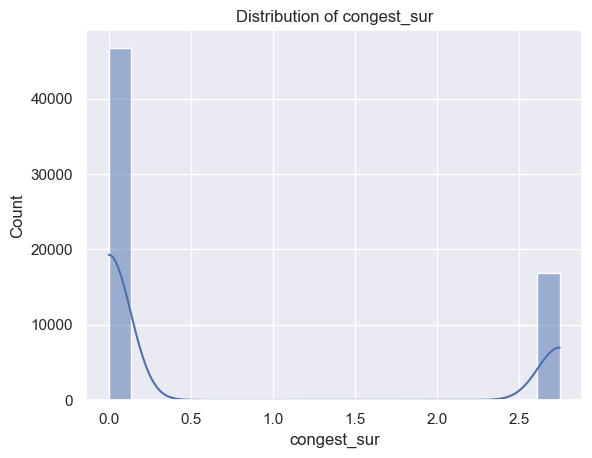

In [56]:
# check with histogram of congest_sur
sns.histplot(data=df, x='congest_sur', kde=True);

plt.title('Distribution of congest_sur')
plt.show()

In [57]:
# Histogram data trip_type --> not normally distributed : Use median
df['congest_sur'].fillna(df['congest_sur'].median(), inplace=True)

#### **3.3.6 pu_borough**

In [58]:
df.drop(index=df[(df['pu_loc'] == 264) | (df['pu_loc'] == 265)].index, inplace=True)

In [59]:
df.drop(index=df[(df['do_loc'] == 264) | (df['do_loc'] == 265)].index, inplace=True)

### **3.4 Change the Data Type**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67516 entries, nan to 68173.0
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pu_datetime      67499 non-null  object 
 1   do_datetime      67499 non-null  object 
 2   ratecode         67516 non-null  float64
 3   pu_loc           67499 non-null  float64
 4   do_loc           67516 non-null  int64  
 5   passenger_count  67516 non-null  float64
 6   trip_distance    67499 non-null  float64
 7   fare_amount      67499 non-null  float64
 8   extra            67499 non-null  float64
 9   mta_tax          67499 non-null  float64
 10  tip_amount       67499 non-null  float64
 11  tolls_amount     67499 non-null  float64
 12  improve_sur      67499 non-null  float64
 13  total_amount     67499 non-null  float64
 14  payment_type     67516 non-null  float64
 15  trip_type        67516 non-null  float64
 16  congest_sur      67516 non-null  float64
 17  pu_borough   

In [61]:
# Mengubah 'pu_datetime' and 'do_datetime' columns to datetime type
df['pu_datetime'] = df['pu_datetime'].astype('datetime64[s]')
df['do_datetime'] = df['do_datetime'].astype('datetime64[s]')

# Mengubah float to integer (assuming it contains have to be integer values)
df['ratecode'] = df['ratecode'].astype(int)
df['passenger_count'] = df['passenger_count'].astype(int)
# df['improve_sur'] = df['improve_sur'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)
df['trip_type'] = df['trip_type'].astype(int)

### **3.5 Add the Columns**

#### **3.5.1 duration**

In [62]:
df = df.assign(duration= lambda x: x.do_datetime - x.pu_datetime)
df.head(1)

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone,duration
NaN,NaT,NaT,1,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0.0,NaN,NaN,EWR,Newark Airport,NaT


#### **3.5.2 dur_seconds**

In [63]:
df['dur_seconds'] = pd.to_timedelta(df['duration']).dt.total_seconds()
df.head(1)

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone,duration,dur_seconds
NaN,NaT,NaT,1,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0.0,NaN,NaN,EWR,Newark Airport,NaT,NaN


#### **3.5.3 pu_day, pu_hour, do_day, do_hour**

In [64]:
df['pu_day'] = df['pu_datetime'].dt.day_name()
df['pu_hour'] = df['pu_datetime'].dt.hour

df['do_day'] = df['do_datetime'].dt.day_name()
df['do_hour'] = df['do_datetime'].dt.hour

#### **3.5.4 speed_mph**

In [65]:
df['speed_mph'] = (df['trip_distance'] / (df['dur_seconds'] / 3600)).round(2)
df.head(1)

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone,duration,dur_seconds,pu_day,pu_hour,do_day,do_hour,speed_mph
NaN,NaT,NaT,1,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0.0,NaN,NaN,EWR,Newark Airport,NaT,NaN,NaN,NaN,NaN,NaN,NaN


### **3.6  Cleaning Anomali & Outliers Data**

In [66]:
df.columns

Index(['pu_datetime', 'do_datetime', 'ratecode', 'pu_loc', 'do_loc',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improve_sur', 'total_amount',
       'payment_type', 'trip_type', 'congest_sur', 'pu_borough', 'pu_zone',
       'do_borough', 'do_zone', 'duration', 'dur_seconds', 'pu_day', 'pu_hour',
       'do_day', 'do_hour', 'speed_mph'],
      dtype='object')

In [67]:
df = df[['pu_loc','do_loc', 'pu_datetime', 'do_datetime', 'trip_distance',
         'pu_day', 'do_day', 'pu_hour', 'do_hour', 'duration', 'dur_seconds', 'speed_mph', 
         'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improve_sur', 'congest_sur',
         'payment_type', 'trip_type', 'ratecode', 'passenger_count','pu_borough', 'pu_zone', 'do_borough', 'do_zone']]
df.head()

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
NaN,NaN,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,1,1,1,NaN,NaN,EWR,Newark Airport
834.0,65.0,1,2023-01-01 16:08:11,2023-01-01 17:02:53,14.81,Sunday,Sunday,16.0,17.0,0 days 00:54:42,3282.0,16.24,110.0,0.0,0.0,22.20,0.00,1.0,0.0,1,2,5,3,Brooklyn,Downtown Brooklyn/MetroTech,Queens,Jamaica Bay
1445.0,166.0,1,2023-01-02 08:57:41,2023-01-02 09:39:53,26.94,Monday,Monday,8.0,9.0,0 days 00:42:12,2532.0,38.30,121.7,0.0,0.0,33.94,13.75,0.3,0.0,1,1,3,3,Manhattan,Morningside Heights,Queens,Jamaica Bay
1968.0,65.0,1,2023-01-02 14:53:46,2023-01-02 15:41:00,14.54,Monday,Monday,14.0,15.0,0 days 00:47:14,2834.0,18.47,110.0,0.0,0.0,10.00,0.00,1.0,0.0,1,2,5,4,Brooklyn,Downtown Brooklyn/MetroTech,Queens,Jamaica Bay
4986.0,166.0,1,2023-01-04 08:26:32,2023-01-04 09:03:20,26.76,Wednesday,Wednesday,8.0,9.0,0 days 00:36:48,2208.0,43.63,118.2,0.0,0.0,0.00,13.75,1.0,0.0,1,1,3,1,Manhattan,Morningside Heights,Queens,Jamaica Bay


#### **3.6.1 pu_datetime != Jan 2023**

In [68]:
df[(df['pu_datetime'].dt.year != 2023) | (df['pu_datetime'].dt.month != 1)]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
NaN,NaN,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,1,1,1,NaN,NaN,EWR,Newark Airport
NaN,NaN,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,1,1,1,NaN,NaN,Bronx,Allerton/Pelham Gardens
NaN,NaN,5,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,1,1,1,NaN,NaN,Staten Island,Arrochar/Fort Wadsworth
NaN,NaN,6,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,1,1,1,NaN,NaN,Queens,Astoria
NaN,NaN,30,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,1,1,1,NaN,NaN,Bronx,Bronx Park
298.0,7.0,56,2022-12-09 14:10:49,2022-12-09 14:22:26,5.37,Friday,Friday,14.0,14.0,0 days 00:11:37,697.0,27.74,16.0,0.0,0.5,0.00,0.00,0.3,0.00,2,1,1,1,Queens,Astoria,Queens,Corona
NaN,NaN,84,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,1,1,1,NaN,NaN,Brooklyn,Erasmus
NaN,NaN,99,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,1,1,1,NaN,NaN,Manhattan,Garment District
NaN,NaN,103,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,1,1,1,NaN,NaN,Manhattan,Governor's Island/Ellis Island/Liberty Island
NaN,NaN,104,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,1,1,1,NaN,NaN,Manhattan,Governor's Island/Ellis Island/Liberty Island


In [69]:
df.drop(index=df[df['pu_datetime'].dt.year != 2023].index, inplace=True)
df.drop(index=df[df['pu_datetime'].dt.month != 1].index, inplace=True)
df.shape

# delete 4 data

(67495, 27)

#### **3.6.2 pu_datetime = do_datetime**

In [70]:
df[df['pu_datetime'] == df['do_datetime']]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
42036.0,21.0,21,2023-01-21 17:09:25,2023-01-21 17:09:25,0.0,Saturday,Saturday,17.0,17.0,0 days,0.0,NaN,15.20,0.0,1.5,0.00,0.0,1.0,0.0,1,1,1,1,Brooklyn,Bensonhurst East,Brooklyn,Bensonhurst West
16726.0,33.0,33,2023-01-09 17:00:08,2023-01-09 17:00:08,0.0,Monday,Monday,17.0,17.0,0 days,0.0,NaN,15.20,0.0,1.5,0.00,0.0,1.0,0.0,2,1,1,1,Brooklyn,Brooklyn Heights,Brooklyn,Brooklyn Navy Yard
7159.0,42.0,42,2023-01-05 07:54:34,2023-01-05 07:54:34,1.9,Thursday,Thursday,7.0,7.0,0 days,0.0,inf,12.80,0.0,1.5,0.00,0.0,1.0,0.0,2,1,1,1,Manhattan,Central Harlem North,Manhattan,Central Park
25514.0,49.0,49,2023-01-13 16:57:42,2023-01-13 16:57:42,0.0,Friday,Friday,16.0,16.0,0 days,0.0,NaN,18.50,0.0,1.5,0.00,0.0,1.0,0.0,1,1,1,1,Brooklyn,Clinton Hill,Manhattan,Clinton West
52195.0,55.0,55,2023-01-26 12:47:11,2023-01-26 12:47:11,0.0,Thursday,Thursday,12.0,12.0,0 days,0.0,NaN,41.20,0.0,1.5,0.00,0.0,1.0,0.0,1,1,1,1,Brooklyn,Coney Island,Queens,Corona
65611.0,74.0,74,2023-01-13 16:24:00,2023-01-13 16:24:00,0.0,Friday,Friday,16.0,16.0,0 days,0.0,NaN,16.03,0.0,0.0,3.41,0.0,1.0,0.0,1,1,1,1,Manhattan,East Harlem North,Manhattan,East Harlem South
66955.0,83.0,83,2023-01-23 04:49:00,2023-01-23 04:49:00,0.0,Monday,Monday,4.0,4.0,0 days,0.0,NaN,12.02,0.0,0.0,0.00,0.0,1.0,0.0,1,1,1,1,Queens,Elmhurst/Maspeth,Staten Island,Eltingville/Annadale/Prince's Bay


In [71]:
df[df['pu_datetime'] == df['do_datetime']][['pu_datetime']].count()

pu_datetime    7
dtype: int64

In [72]:
df.drop(index=df[df['pu_datetime'] == df['do_datetime']].index, inplace=True)

# menghapus 61 data

#### **3.6.3 trip_distance**

In [73]:
df['trip_distance'].describe()

count     67488.000000
mean          8.148349
std         588.230976
min           0.000000
25%           1.130000
50%           1.850000
75%           3.200000
max      120098.840000
Name: trip_distance, dtype: float64

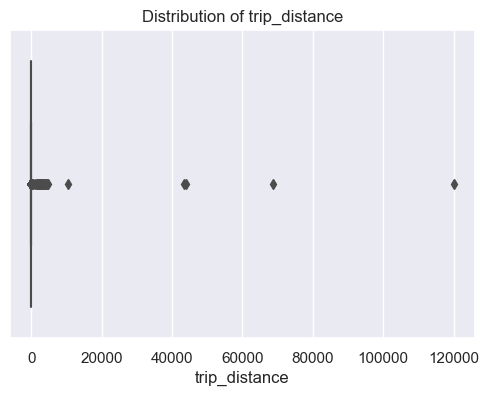

In [74]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x='trip_distance')
plt.title('Distribution of trip_distance')
plt.show()

df[(df['trip_distance'] < (Q1 - 1.5 * IQR)) | (df['trip_distance'] > (Q3 + 1.5 * IQR))]['trip_distance'].describe()

**IQR vs Fair Value (maks value of trip_distance)**

In [75]:
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
IQR

2.0700000000000003

In [76]:
df[(df['trip_distance'] < (Q1 - 1.5 * IQR))]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone


In [77]:
df[(df['trip_distance'] > (Q3 + 1.5 * IQR))]['trip_distance'].describe()

count      5638.000000
mean         75.263386
std        2034.112706
min           6.310000
25%           7.050000
50%           8.140000
75%          10.527500
max      120098.840000
Name: trip_distance, dtype: float64

In [78]:
df[(df['trip_distance'] > (Q3 + 1.5 * IQR))]['trip_distance'].count()

5638

In [79]:
df[(df['trip_distance'] > (Q3 + 1.5 * IQR))]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
834.0,65.0,1,2023-01-01 16:08:11,2023-01-01 17:02:53,14.81,Sunday,Sunday,16.0,17.0,0 days 00:54:42,3282.0,16.24,110.00,0.0,0.0,22.20,0.00,1.0,0.0,1,2,5,3,Brooklyn,Downtown Brooklyn/MetroTech,Queens,Jamaica Bay
1445.0,166.0,1,2023-01-02 08:57:41,2023-01-02 09:39:53,26.94,Monday,Monday,8.0,9.0,0 days 00:42:12,2532.0,38.30,121.70,0.0,0.0,33.94,13.75,0.3,0.0,1,1,3,3,Manhattan,Morningside Heights,Queens,Jamaica Bay
1968.0,65.0,1,2023-01-02 14:53:46,2023-01-02 15:41:00,14.54,Monday,Monday,14.0,15.0,0 days 00:47:14,2834.0,18.47,110.00,0.0,0.0,10.00,0.00,1.0,0.0,1,2,5,4,Brooklyn,Downtown Brooklyn/MetroTech,Queens,Jamaica Bay
4986.0,166.0,1,2023-01-04 08:26:32,2023-01-04 09:03:20,26.76,Wednesday,Wednesday,8.0,9.0,0 days 00:36:48,2208.0,43.63,118.20,0.0,0.0,0.00,13.75,1.0,0.0,1,1,3,1,Manhattan,Morningside Heights,Queens,Jamaica Bay
7806.0,65.0,1,2023-01-05 12:58:51,2023-01-05 13:27:40,14.49,Thursday,Thursday,12.0,13.0,0 days 00:28:49,1729.0,30.17,110.00,0.0,0.0,20.00,11.75,1.0,0.0,1,2,5,1,Brooklyn,Downtown Brooklyn/MetroTech,Queens,Jamaica Bay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65836.0,42.0,263,2023-01-15 01:44:04,2023-01-15 02:11:51,10.00,Sunday,Sunday,1.0,2.0,0 days 00:27:47,1667.0,21.60,41.50,1.0,0.5,9.35,0.00,1.0,0.0,1,1,1,1,Manhattan,Central Harlem North,Unknown,NaN
66163.0,75.0,263,2023-01-17 21:53:00,2023-01-17 22:53:00,8.53,Tuesday,Tuesday,21.0,22.0,0 days 01:00:00,3600.0,8.53,28.19,0.0,0.0,0.00,0.00,1.0,0.0,1,1,1,1,Manhattan,East Harlem South,Unknown,NaN
67797.0,33.0,263,2023-01-28 17:51:00,2023-01-28 18:20:00,9.01,Saturday,Saturday,17.0,18.0,0 days 00:29:00,1740.0,18.64,37.62,0.0,0.0,8.27,0.00,1.0,0.0,1,1,1,1,Brooklyn,Brooklyn Heights,Unknown,NaN
67876.0,25.0,263,2023-01-29 10:47:00,2023-01-29 11:19:00,8.93,Sunday,Sunday,10.0,11.0,0 days 00:32:00,1920.0,16.74,27.58,0.0,0.0,2.00,0.00,1.0,0.0,1,1,1,1,Brooklyn,Boerum Hill,Unknown,NaN


In [80]:
df[df['trip_distance'] > 70]['trip_distance'].count()

37

**Berdasarkan eksplorasi value kolom 'trip_distance' :**
    
- Apabila outliers dicari dengan menggunakan metode IQR, maka nilai 6.36 sudah termasuk outliers (sedangkan angka tsb masih dalam rentang jarak zona TLC)

- Dengan cara IQR terdapat 5785 data outliers (hal ini sangat significant bila data dihapuskan)

- Dan ketika dilakukan eksplorasi lebih lanjut disimpulkan, angka normal maks dari 'trip_distance' adalah 70

- Sehingga perlu dilakukan penghapusan thd data 'trip_distance' > 70 miles

In [81]:
df.drop(index=df[df['trip_distance'] > 70].index, inplace=True)

# Menghapus 37 data

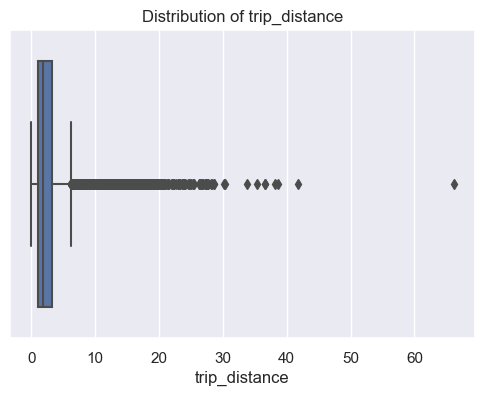

In [82]:
plt.figure(figsize=(6,4))
sns.boxplot(df, x='trip_distance')
plt.title('Distribution of trip_distance')

plt.show()

#### **3.6.4 fare_amount**

**fare_amount (minus)**

In [83]:
df[(df['fare_amount'] < 0)]['fare_amount'].describe()

count    170.000000
mean      -6.823059
std       10.997839
min      -70.000000
25%       -5.625000
50%       -3.000000
75%       -3.000000
max       -2.500000
Name: fare_amount, dtype: float64

In [84]:
df[(df['fare_amount'] < 0)]['dur_seconds'].describe()

count     170.000000
mean      136.652941
std       224.879804
min         3.000000
25%        23.750000
50%        49.500000
75%       159.250000
max      1740.000000
Name: dur_seconds, dtype: float64

**Berdasarkan deskripsi diatas, value dari fare_amount < 0, masih didalam rentang dur_seconds (max = 1740 detik )**

- Value fare_amount dapat (dimutlakkan)

In [85]:
df.loc[(df['fare_amount'] < 0), 'fare_amount'] = abs(df.loc[(df['fare_amount'] < 0), 'fare_amount'])

**fare_amount (unnormal < 3)**

In [86]:
df['fare_amount'].describe()

count    67451.00000
mean        16.43297
std         12.69317
min          0.00000
25%          9.30000
50%         13.31000
75%         19.80000
max        490.00000
Name: fare_amount, dtype: float64

In [87]:
df[df['fare_amount'] < 3]['fare_amount'].count()

142

In [88]:
df.drop(index=df[df['fare_amount'] < 3]['fare_amount'].index, inplace=True)

**fare_amount (outliers) vs trip_distance vs dur_seconds**

In [89]:
df['fare_amount'].describe()

count    67309.000000
mean        16.465484
std         12.686656
min          3.000000
25%          9.300000
50%         13.500000
75%         19.800000
max        490.000000
Name: fare_amount, dtype: float64

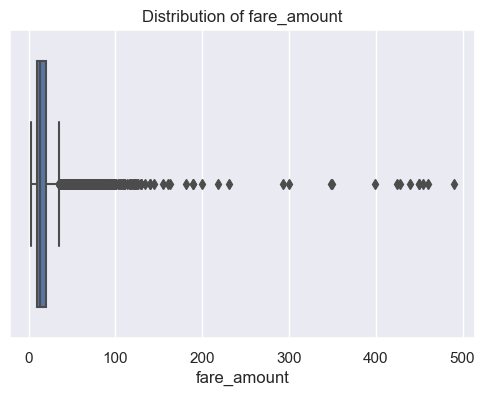

In [90]:
plt.figure(figsize=(6,4))
sns.boxplot(df, x='fare_amount')
plt.title('Distribution of fare_amount')

plt.show()

In [91]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

df[(df['fare_amount'] < (Q1 - 1.5 * IQR)) | (df['fare_amount'] > (Q3 + 1.5 * IQR))]['fare_amount'].describe()

count    4034.000000
mean       50.619593
std        25.823190
min        35.560000
25%        39.200000
50%        44.300000
75%        54.997500
max       490.000000
Name: fare_amount, dtype: float64

In [92]:
df.shape

(67309, 27)

abnormal :

- trip_distance = 0

- dur_seconds < 600

- fare_amount > 15

In [93]:
df[(df['trip_distance'] == 0) & (df['dur_seconds'] < 600) & (df['fare_amount'] > 15)]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
11789.0,7.0,7,2023-01-07 04:01:10,2023-01-07 04:02:35,0.0,Saturday,Saturday,4.0,4.0,0 days 00:01:25,85.0,0.0,60.0,0.0,0.0,0.00,0.0,-1.0,0.0,3,2,5,1,Queens,Astoria,Queens,Astoria Park
11790.0,7.0,7,2023-01-07 04:01:10,2023-01-07 04:02:35,0.0,Saturday,Saturday,4.0,4.0,0 days 00:01:25,85.0,0.0,60.0,0.0,0.0,0.00,0.0,1.0,0.0,3,2,5,1,Queens,Astoria,Queens,Astoria Park
14432.0,7.0,7,2023-01-08 14:59:57,2023-01-08 15:00:01,0.0,Sunday,Sunday,14.0,15.0,0 days 00:00:04,4.0,0.0,20.0,0.0,0.0,4.20,0.0,1.0,0.0,1,2,5,1,Queens,Astoria,Queens,Astoria Park
17294.0,7.0,7,2023-01-09 22:58:26,2023-01-09 22:58:29,0.0,Monday,Monday,22.0,22.0,0 days 00:00:03,3.0,0.0,40.0,0.0,0.0,0.08,0.0,1.0,0.0,1,2,5,1,Queens,Astoria,Queens,Astoria Park
24954.0,7.0,7,2023-01-13 13:35:32,2023-01-13 13:42:34,0.0,Friday,Friday,13.0,13.0,0 days 00:07:02,422.0,0.0,15.5,0.0,1.5,0.00,0.0,1.0,0.0,1,1,1,1,Queens,Astoria,Queens,Astoria Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56330.0,260.0,260,2023-01-28 05:01:48,2023-01-28 05:01:53,0.0,Saturday,Saturday,5.0,5.0,0 days 00:00:05,5.0,0.0,72.0,0.0,0.0,0.00,0.0,1.0,0.0,1,2,5,1,Queens,Woodside,Manhattan,World Trade Center
63414.0,260.0,260,2023-01-31 18:05:36,2023-01-31 18:07:15,0.0,Tuesday,Tuesday,18.0,18.0,0 days 00:01:39,99.0,0.0,20.0,0.0,0.0,0.00,0.0,1.0,0.0,2,2,5,1,Queens,Woodside,Manhattan,World Trade Center
12036.0,262.0,262,2023-01-07 10:50:47,2023-01-07 10:58:26,0.0,Saturday,Saturday,10.0,10.0,0 days 00:07:39,459.0,0.0,15.2,0.0,1.5,0.00,0.0,1.0,0.0,1,1,1,1,Manhattan,Yorkville East,Manhattan,Yorkville West
21838.0,74.0,263,2023-01-12 05:16:57,2023-01-12 05:25:47,0.0,Thursday,Thursday,5.0,5.0,0 days 00:08:50,530.0,0.0,20.5,0.0,1.5,0.00,0.0,1.0,0.0,1,1,1,1,Manhattan,East Harlem North,Unknown,NaN


In [94]:
df.drop(index=df[(df['trip_distance'] == 0) & (df['dur_seconds'] < 600) & (df['fare_amount'] > 15)].index, inplace=True)

abnormal :

- trip_distance < 0

- dur_seconds < 1800

- fare_amount > 30

In [95]:
df[(df['trip_distance'] < 5) & (df['dur_seconds'] < 1800) & (df['fare_amount'] > 30)]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
65188.0,230.0,1,2023-01-11 01:58:00,2023-01-11 02:26:00,0.00,Wednesday,Wednesday,1.0,2.0,0 days 00:28:00,1680.0,0.00,99.35,0.0,0.0,36.10,20.0,1.0,0.0,1,1,1,1,Manhattan,Times Sq/Theatre District,Queens,Jamaica Bay
15635.0,7.0,7,2023-01-09 09:51:43,2023-01-09 09:52:09,0.01,Monday,Monday,9.0,9.0,0 days 00:00:26,26.0,1.38,70.00,0.0,0.5,0.00,0.0,1.0,0.0,2,1,2,1,Queens,Astoria,Queens,Astoria Park
59698.0,94.0,7,2023-01-30 05:01:00,2023-01-30 05:28:37,0.00,Monday,Monday,5.0,5.0,0 days 00:27:37,1657.0,0.00,36.50,0.0,1.5,0.00,0.0,1.0,0.0,1,1,1,1,Bronx,Fordham South,Queens,Astoria Park
29627.0,70.0,10,2023-01-15 17:03:19,2023-01-15 17:25:19,0.00,Sunday,Sunday,17.0,17.0,0 days 00:22:00,1320.0,0.00,31.50,0.0,1.5,0.00,0.0,1.0,0.0,1,1,1,1,Queens,East Elmhurst,Brooklyn,Bath Beach
66264.0,11.0,11,2023-01-18 16:41:00,2023-01-18 16:44:00,0.01,Wednesday,Wednesday,16.0,16.0,0 days 00:03:00,180.0,0.20,48.19,0.0,0.0,0.92,0.0,1.0,0.0,1,1,1,1,Brooklyn,Bath Beach,Manhattan,Battery Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28555.0,80.0,256,2023-01-15 01:39:55,2023-01-15 01:49:31,2.15,Sunday,Sunday,1.0,1.0,0 days 00:09:36,576.0,13.44,40.00,0.0,0.0,5.00,0.0,1.0,0.0,1,2,5,1,Brooklyn,East Williamsburg,Brooklyn,Windsor Terrace
40786.0,80.0,256,2023-01-21 02:35:45,2023-01-21 02:43:22,1.78,Saturday,Saturday,2.0,2.0,0 days 00:07:37,457.0,14.02,40.00,0.0,0.0,2.00,0.0,0.3,0.0,1,2,5,2,Brooklyn,East Williamsburg,Brooklyn,Windsor Terrace
13245.0,226.0,260,2023-01-07 19:45:10,2023-01-07 20:02:08,2.46,Saturday,Saturday,19.0,20.0,0 days 00:16:58,1018.0,8.70,70.00,0.0,0.0,0.00,0.0,1.0,0.0,2,2,5,1,Queens,Sunnyside,Manhattan,World Trade Center
46765.0,260.0,260,2023-01-24 08:45:38,2023-01-24 08:48:13,0.33,Tuesday,Tuesday,8.0,8.0,0 days 00:02:35,155.0,7.66,70.00,0.0,0.5,0.00,0.0,1.0,0.0,2,1,2,4,Queens,Woodside,Manhattan,World Trade Center


In [96]:
df.drop(index=df[(df['trip_distance'] < 5) & (df['dur_seconds'] < 1800) & (df['fare_amount'] > 30)].index, inplace=True)

In [97]:
df['fare_amount'].describe()

count    66701.000000
mean        16.207944
std         11.208866
min          3.000000
25%          9.300000
50%         12.870000
75%         19.500000
max        348.100000
Name: fare_amount, dtype: float64

In [98]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
IQR

10.2

In [99]:
df[(df['fare_amount'] > (Q3 + 1.5 * IQR))]['fare_amount'].describe()

count    4066.000000
mean       48.083200
std        15.835699
min        34.810000
25%        38.000000
50%        42.900000
75%        52.700000
max       348.100000
Name: fare_amount, dtype: float64

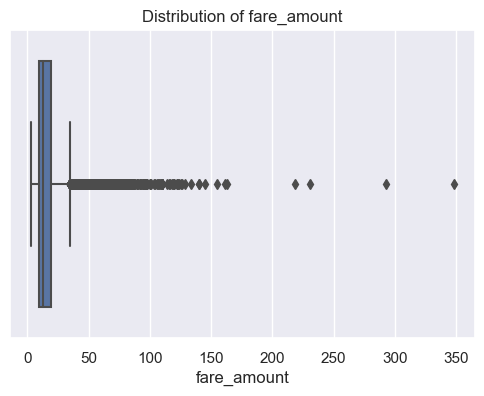

In [100]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x='fare_amount')
plt.title('Distribution of fare_amount')
plt.show()

outliers :

- fare_amount > 250

In [101]:
df[df['fare_amount'] > 250]['fare_amount'].count()

2

In [102]:
df.drop(index=df[df['fare_amount'] > 250]['fare_amount'].index, inplace=True)

In [103]:
df['fare_amount'].describe()

count    66699.000000
mean        16.198821
std         11.083495
min          3.000000
25%          9.300000
50%         12.870000
75%         19.500000
max        230.500000
Name: fare_amount, dtype: float64

#### **3.6.5 dur_seconds**

In [104]:
df['dur_seconds'].describe()

count    66699.000000
mean      1082.341849
std       4454.207185
min          1.000000
25%        441.000000
50%        687.000000
75%       1045.000000
max      86336.000000
Name: dur_seconds, dtype: float64

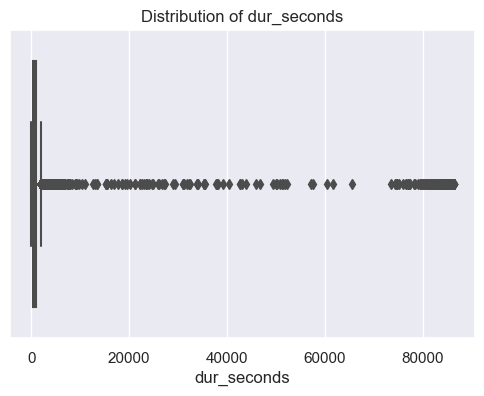

In [105]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x='dur_seconds')
plt.title('Distribution of dur_seconds')
plt.show()

In [106]:
Q1 = df['dur_seconds'].quantile(0.25)
Q3 = df['dur_seconds'].quantile(0.75)
IQR = Q3 - Q1
IQR

604.0

In [107]:
df[(df['dur_seconds'] < (Q1 - 1.5 * IQR)) | (df['dur_seconds'] > (Q3 + 1.5 * IQR))]['dur_seconds'].describe()

count     3468.000000
mean      7445.020473
std      18328.106686
min       1952.000000
25%       2134.000000
50%       2460.000000
75%       3110.250000
max      86336.000000
Name: dur_seconds, dtype: float64

In [108]:
df[df['dur_seconds'] > 40000]['dur_seconds'].count()

199

Abnormal :

- duration > 2.5 hour

In [109]:
df.drop(index=df[df['dur_seconds'] > 10000]['dur_seconds'].index, inplace=True)

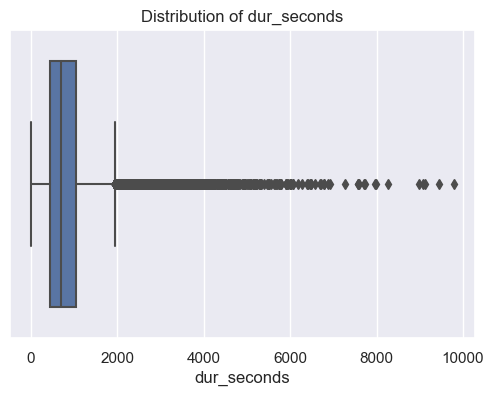

In [110]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x='dur_seconds')
plt.title('Distribution of dur_seconds')
plt.show()

#### **3.6.6 speed_mph**

In [111]:
df['speed_mph'].describe()

count    66446.000000
mean        12.938964
std         80.720021
min          0.000000
25%          8.290000
50%         10.460000
75%         13.510000
max      11700.000000
Name: speed_mph, dtype: float64

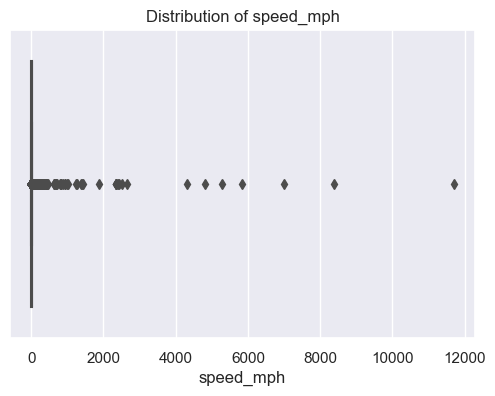

In [112]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x='speed_mph')
plt.title('Distribution of speed_mph')
plt.show()

In [113]:
df[df['speed_mph'] > 25]['speed_mph'].count()

2134

Abnormal :

- speed_mph > 25

In [114]:
df.drop(index=df[df['speed_mph'] > 25]['speed_mph'].index, inplace=True)

#### **3.6.7 passenger_count**

In [115]:
df['passenger_count'].value_counts()

passenger_count
1    55527
2     4827
5     1685
6     1027
3      903
4      340
8        1
9        1
7        1
Name: count, dtype: int64

Abnormal :

- passenger_count > 5

In [116]:
df.drop(index=df[df['passenger_count'] > 5]['passenger_count'].index, inplace=True)

#### **3.6.8 extra**

In [117]:
df['extra'].value_counts().sort_index()

extra
-2.50       47
-1.00       30
 0.00    37437
 0.50      555
 1.00    10424
 2.50    11741
 2.75     1543
 3.25       48
 3.75      199
 5.00      477
 5.25      490
 6.00       31
 7.50      260
Name: count, dtype: int64

In [118]:
df.drop(index=df[df['extra'] < 0]['extra'].index, inplace=True)

#### **3.6.9 mta_tax**

In [119]:
df['mta_tax'].value_counts().sort_index()

mta_tax
-0.5       74
 0.0     4552
 0.5    50101
 1.0       18
 1.5     8460
Name: count, dtype: int64

In [120]:
df.drop(index=df[df['mta_tax'] < 0]['mta_tax'].index, inplace=True)

#### **3.6.9 tip_amount**

In [121]:
df['tip_amount'].value_counts().sort_index()

tip_amount
0.00      26264
0.01        148
0.02         41
0.03         14
0.04          9
          ...  
72.55         1
77.88         1
80.00         2
80.88         1
222.22        1
Name: count, Length: 1358, dtype: int64

In [122]:
df['tip_amount'].describe()

count    63131.000000
mean         2.072738
std          2.825849
min          0.000000
25%          0.000000
50%          1.660000
75%          3.270000
max        222.220000
Name: tip_amount, dtype: float64

In [123]:
Q1 = df['tip_amount'].quantile(0.25)
Q3 = df['tip_amount'].quantile(0.75)
IQR = Q3 - Q1
IQR

df[(df['tip_amount'] < (Q1 - 1.5 * IQR)) | (df['tip_amount'] > (Q3 + 1.5 * IQR))]['tip_amount'].count()

1564

In [124]:
df.drop(index=df[(df['tip_amount'] < (Q1 - 1.5 * IQR)) | (df['tip_amount'] > (Q3 + 1.5 * IQR))]['tip_amount'].index, inplace=True)

#### **3.6.10 tolls_amount**

In [125]:
df['improve_sur'].describe()

count    61567.000000
mean         0.957861
std          0.167666
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: improve_sur, dtype: float64

In [126]:
df['improve_sur'].value_counts().sort_index()

improve_sur
-1.0        2
-0.3        1
 0.0       60
 0.3     3613
 1.0    57891
Name: count, dtype: int64

In [127]:
df.drop(index=df[df['improve_sur'] < 0]['improve_sur'].index, inplace=True)

In [128]:
df.shape

(61564, 27)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61564 entries, 18036.0 to 68173.0
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pu_loc           61564 non-null  float64       
 1   do_loc           61564 non-null  int64         
 2   pu_datetime      61564 non-null  datetime64[s] 
 3   do_datetime      61564 non-null  datetime64[s] 
 4   trip_distance    61564 non-null  float64       
 5   pu_day           61564 non-null  object        
 6   do_day           61564 non-null  object        
 7   pu_hour          61564 non-null  float64       
 8   do_hour          61564 non-null  float64       
 9   duration         61564 non-null  timedelta64[s]
 10  dur_seconds      61564 non-null  float64       
 11  speed_mph        61564 non-null  float64       
 12  fare_amount      61564 non-null  float64       
 13  extra            61564 non-null  float64       
 14  mta_tax          61564 non-null  fl

#### **3.6.11 total_amount**

In [130]:
df[df['do_zone'].isna()]['pu_loc'].value_counts()

pu_loc
74.0     656
75.0     466
43.0     155
41.0      60
166.0     54
236.0     27
42.0      24
244.0      9
7.0        8
24.0       8
116.0      4
223.0      3
263.0      3
82.0       3
152.0      3
260.0      2
65.0       2
33.0       2
112.0      2
80.0       1
182.0      1
17.0       1
95.0       1
129.0      1
66.0       1
256.0      1
179.0      1
181.0      1
49.0       1
255.0      1
159.0      1
25.0       1
Name: count, dtype: int64

In [131]:
df[df['pu_borough'].isna()]['pu_loc'].value_counts()

Series([], Name: count, dtype: int64)

In [132]:
df['total_amount'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improve_sur'] + df['congest_sur']

df.head()

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone,total_amount
18036.0,226.0,1,2023-01-10 12:33:59,2023-01-10 13:16:24,17.36,Tuesday,Tuesday,12.0,13.0,0 days 00:42:25,2545.0,24.56,120.0,0.00,0.0,0.0,12.75,1.0,0.00,2,2,5,3,Queens,Sunnyside,Queens,Jamaica Bay,133.75
40973.0,193.0,1,2023-01-21 09:30:20,2023-01-21 10:18:56,18.40,Saturday,Saturday,9.0,10.0,0 days 00:48:36,2916.0,22.72,74.4,2.75,1.5,0.9,19.30,1.0,2.75,1,1,1,1,Queens,Queensbridge/Ravenswood,Queens,Jamaica Bay,102.60
7251.0,51.0,3,2023-01-05 08:43:00,2023-01-05 08:54:28,0.00,Thursday,Thursday,8.0,8.0,0 days 00:11:28,688.0,0.00,16.5,0.00,1.5,0.0,0.00,1.0,0.00,1,1,1,1,Bronx,Co-Op City,Manhattan,Alphabet City,19.00
16032.0,3.0,3,2023-01-09 12:37:24,2023-01-09 12:44:45,1.15,Monday,Monday,12.0,12.0,0 days 00:07:21,441.0,9.39,10.0,0.00,0.0,0.0,0.00,1.0,0.00,2,2,5,1,Bronx,Allerton/Pelham Gardens,Manhattan,Alphabet City,11.00
22394.0,18.0,3,2023-01-12 10:17:14,2023-01-12 10:36:17,3.60,Thursday,Thursday,10.0,10.0,0 days 00:19:03,1143.0,11.34,21.2,0.00,1.5,0.0,0.00,1.0,0.00,2,1,1,1,Bronx,Bedford Park,Manhattan,Alphabet City,23.70


In [133]:
df.head(1)

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone,total_amount
18036.0,226.0,1,2023-01-10 12:33:59,2023-01-10 13:16:24,17.36,Tuesday,Tuesday,12.0,13.0,0 days 00:42:25,2545.0,24.56,120.0,0.0,0.0,0.0,12.75,1.0,0.0,2,2,5,3,Queens,Sunnyside,Queens,Jamaica Bay,133.75


In [134]:
df = df[['pu_loc','do_loc', 'pu_datetime', 'do_datetime', 'trip_distance',
         'pu_day', 'do_day', 'pu_hour', 'do_hour', 'duration', 'dur_seconds', 'speed_mph', 
         'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improve_sur', 'congest_sur','total_amount',
         'payment_type', 'trip_type', 'passenger_count','ratecode','pu_borough', 'pu_zone', 'do_borough', 'do_zone']]
df.head()

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,total_amount,payment_type,trip_type,passenger_count,ratecode,pu_borough,pu_zone,do_borough,do_zone
18036.0,226.0,1,2023-01-10 12:33:59,2023-01-10 13:16:24,17.36,Tuesday,Tuesday,12.0,13.0,0 days 00:42:25,2545.0,24.56,120.0,0.00,0.0,0.0,12.75,1.0,0.00,133.75,2,2,3,5,Queens,Sunnyside,Queens,Jamaica Bay
40973.0,193.0,1,2023-01-21 09:30:20,2023-01-21 10:18:56,18.40,Saturday,Saturday,9.0,10.0,0 days 00:48:36,2916.0,22.72,74.4,2.75,1.5,0.9,19.30,1.0,2.75,102.60,1,1,1,1,Queens,Queensbridge/Ravenswood,Queens,Jamaica Bay
7251.0,51.0,3,2023-01-05 08:43:00,2023-01-05 08:54:28,0.00,Thursday,Thursday,8.0,8.0,0 days 00:11:28,688.0,0.00,16.5,0.00,1.5,0.0,0.00,1.0,0.00,19.00,1,1,1,1,Bronx,Co-Op City,Manhattan,Alphabet City
16032.0,3.0,3,2023-01-09 12:37:24,2023-01-09 12:44:45,1.15,Monday,Monday,12.0,12.0,0 days 00:07:21,441.0,9.39,10.0,0.00,0.0,0.0,0.00,1.0,0.00,11.00,2,2,1,5,Bronx,Allerton/Pelham Gardens,Manhattan,Alphabet City
22394.0,18.0,3,2023-01-12 10:17:14,2023-01-12 10:36:17,3.60,Thursday,Thursday,10.0,10.0,0 days 00:19:03,1143.0,11.34,21.2,0.00,1.5,0.0,0.00,1.0,0.00,23.70,2,1,1,1,Bronx,Bedford Park,Manhattan,Alphabet City


## <hr>

#### **3.6.12 pu_zone**

In [135]:
df[df['pu_zone'].isna()]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,total_amount,payment_type,trip_type,passenger_count,ratecode,pu_borough,pu_zone,do_borough,do_zone


In [136]:
df.drop(index=df[df['pu_zone'].isna()]['pu_zone'].index, inplace=True)

## **4. Data Analysis**

### **4.1 Data Correlation**

In [137]:
# Using df.corr of Spearman method to find the correlation of data
df.corr(method='spearman',numeric_only=True)

,pu_loc,do_loc,trip_distance,pu_hour,do_hour,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,total_amount,payment_type,trip_type,passenger_count,ratecode
pu_loc,1.000000,0.058311,0.059919,0.042983,0.041322,0.043145,0.047784,0.071095,0.056224,-0.039876,-0.047853,0.020178,0.019112,-0.127747,0.040882,0.062039,0.036246,0.045387,0.038520
do_loc,0.058311,1.000000,0.212111,0.022308,0.024210,0.173931,0.093249,0.188975,0.070688,-0.002830,0.177096,-0.003001,-0.007235,0.420851,0.276263,-0.101677,-0.007668,0.004561,-0.007359
trip_distance,0.059919,0.212111,1.000000,-0.017712,-0.006259,0.776856,0.490440,0.845456,0.043038,-0.125256,0.276471,0.095905,-0.001700,0.304586,0.816332,-0.069177,-0.028990,0.020943,-0.018326
pu_hour,0.042983,0.022308,-0.017712,1.000000,0.974242,-0.050536,0.027593,-0.050968,0.469593,-0.010494,0.052538,-0.027016,-0.015367,-0.005086,0.027580,-0.024062,-0.009567,-0.003624,-0.007552
do_hour,0.041322,0.024210,-0.006259,0.974242,1.000000,-0.031305,0.020664,-0.033718,0.460087,-0.008584,0.056270,-0.020376,-0.016107,-0.000807,0.043992,-0.025966,-0.011192,-0.007573,-0.008717
dur_seconds,0.043145,0.173931,0.776856,-0.050536,-0.031305,1.000000,-0.034051,0.936691,-0.035460,-0.018481,0.202313,0.143757,-0.003466,0.253718,0.876835,-0.071873,-0.041785,0.008343,-0.033127
speed_mph,0.047784,0.093249,0.490440,0.027593,0.020664,-0.034051,1.000000,0.170419,0.086765,-0.095425,0.131894,0.074601,0.014279,0.128896,0.201317,-0.061065,-0.009330,0.002989,-0.003059
fare_amount,0.071095,0.188975,0.845456,-0.050968,-0.033718,0.936691,0.170419,1.000000,-0.038603,-0.116127,0.232863,0.162264,0.046677,0.256844,0.934755,-0.103654,0.033738,0.007104,0.041737
extra,0.056224,0.070688,0.043038,0.469593,0.460087,-0.035460,0.086765,-0.038603,1.000000,0.214625,0.088050,-0.023713,0.028563,0.120539,0.144394,-0.021874,-0.078669,0.053984,-0.083327
mta_tax,-0.039876,-0.002830,-0.125256,-0.010494,-0.008584,-0.018481,-0.095425,-0.116127,0.214625,1.000000,-0.105500,-0.000583,0.072832,0.089010,-0.033224,0.085277,-0.231276,0.035551,-0.231987


#### **4.1.1 Correlation Matrix**

In [138]:
# Create numeric columns
numeric_columns = df.select_dtypes(include=['int32','float64']).columns

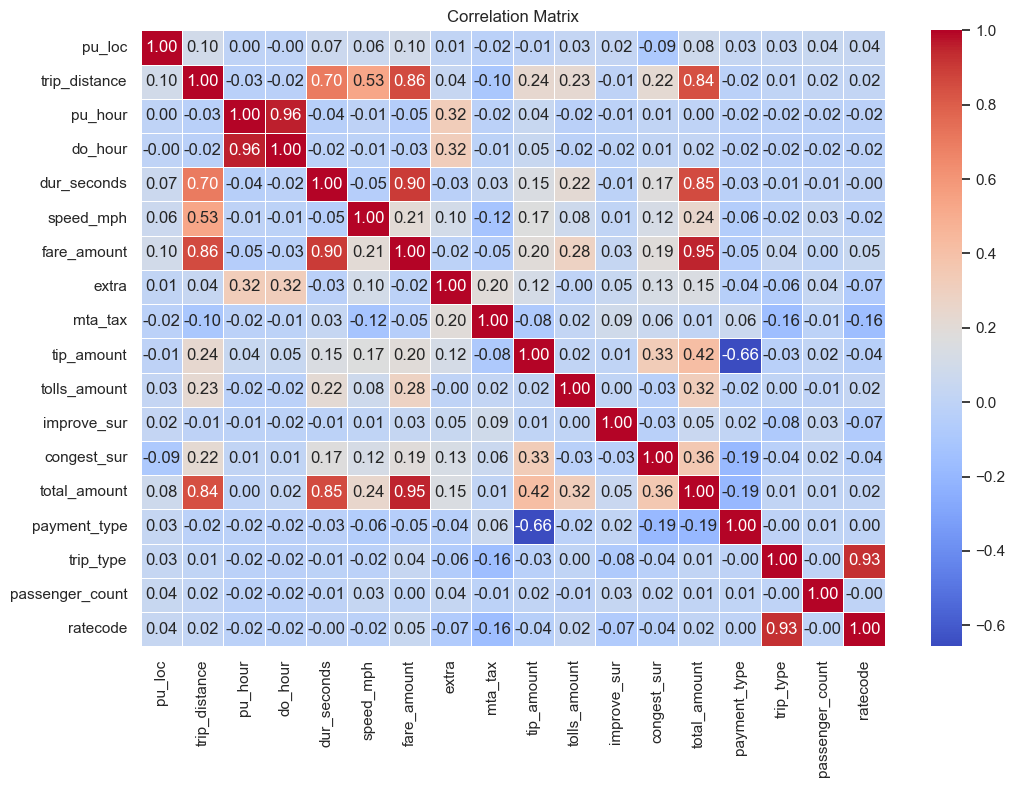

In [139]:
# correlation matrix 
correlation_matrix = df[numeric_columns].corr()

# figure
plt.figure(figsize=(12, 8))

# the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# title of this heatmap
plt.title('Correlation Matrix')

# display the heatmap
plt.show()

**Insight :**

1. trip_distance berkorelasi positif kuat dengan fare_amount, dur_seconds, total_amount, speed_mph (sesuai), trip_distance berkorelasi negatif thd mta_tax (area Nassau, Suffolk, Westchester, Rockland, Dutchess, Orange or Putnam Counties)

#### **4.1.2 dur_seconds vs trip_distance**

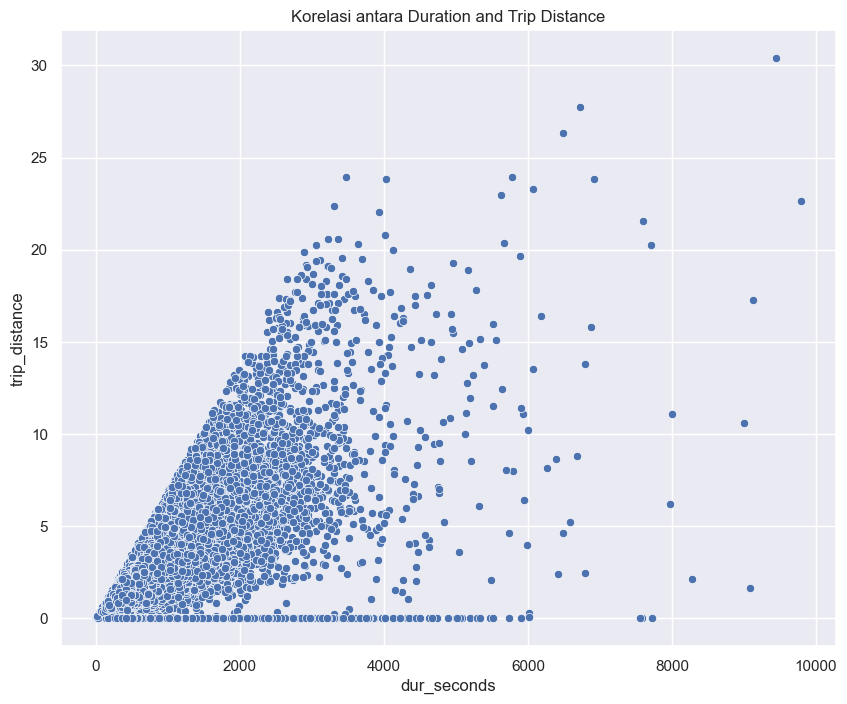

In [140]:
plt.figure(figsize= (10,8))
sns.scatterplot(data= df, x= 'dur_seconds', y= 'trip_distance')
plt.title('Korelasi antara Duration and Trip Distance')
plt.show()

- Scatterplot diatas menunjukkan adanya korelasi positif antara durasi dan trip distance, yang berrati bahwa semakin jauh jarak trip semakin lama durasi tripnya

#### **4.1.3 dur_seconds vs fare_amount**

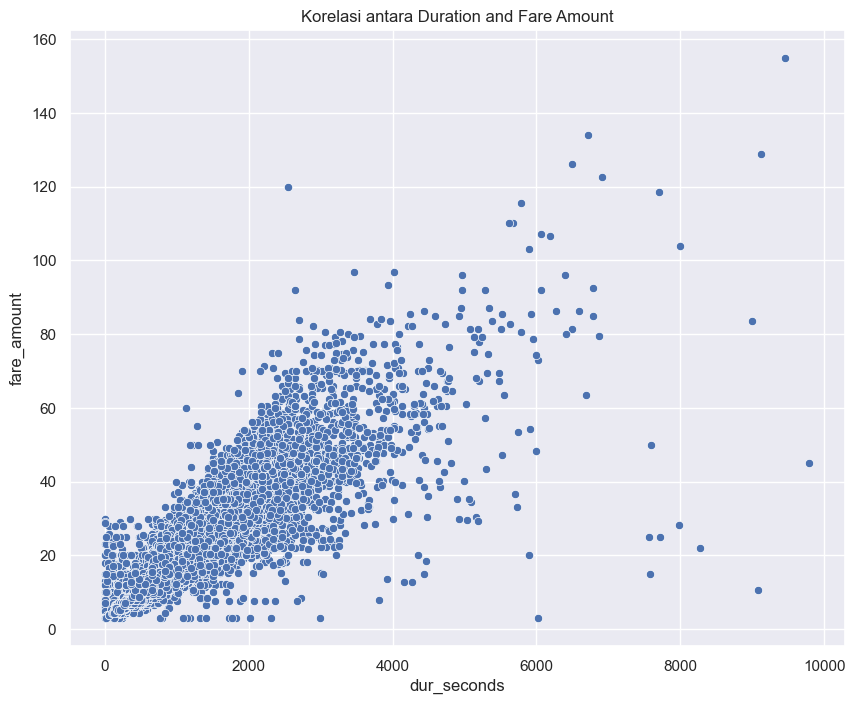

In [141]:
plt.figure(figsize= (10,8))
sns.scatterplot(data= df, x= 'dur_seconds', y= 'fare_amount')
plt.title('Korelasi antara Duration and Fare Amount')
plt.show()

- Scatterplot diatas menunjukkan adanya korelasi positif antara durasi dan fare amount, yang berati bahwa semakin lama semakin banyak fare amount

#### **4.1.4 trip_distance vs tip_amount**

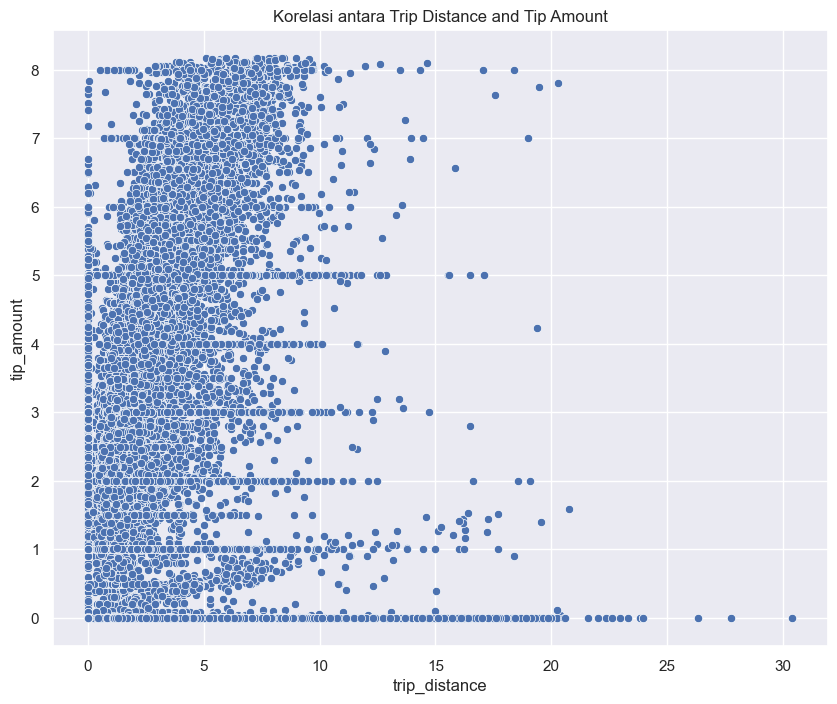

In [142]:
plt.figure(figsize= (10,8))
sns.scatterplot(data= df, x= 'trip_distance', y= 'tip_amount')
plt.title('Korelasi antara Trip Distance and Tip Amount')
plt.show()

- Scatterplot diatas menunjukkan adanya korelasi positif antara trip distance dan tip amount namun kecil, yang berarti trip distance tidak terlalu berpengaruh thd tip amount

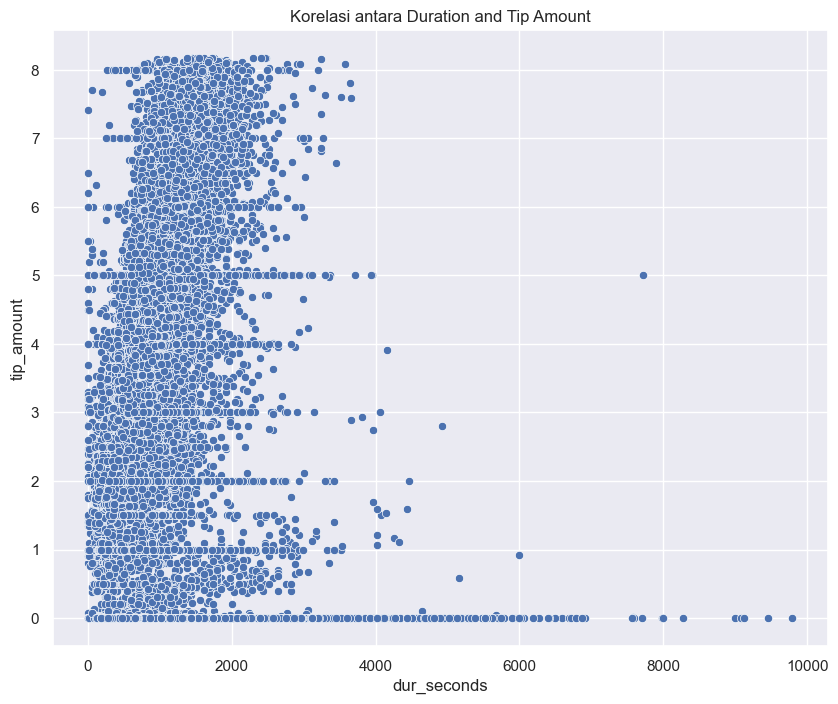

In [143]:
plt.figure(figsize= (10,8))
sns.scatterplot(data= df, x= 'dur_seconds', y= 'tip_amount')
plt.title('Korelasi antara Duration and Tip Amount')
plt.show()

- Scatterplot diatas menunjukkan adanya korelasi positif antara duration dan tip amount namun kecil, yang berarti duration tidak terlalu berpengaruh thd tip amount

Text(0.5, 1.0, 'Borough vs Tip')

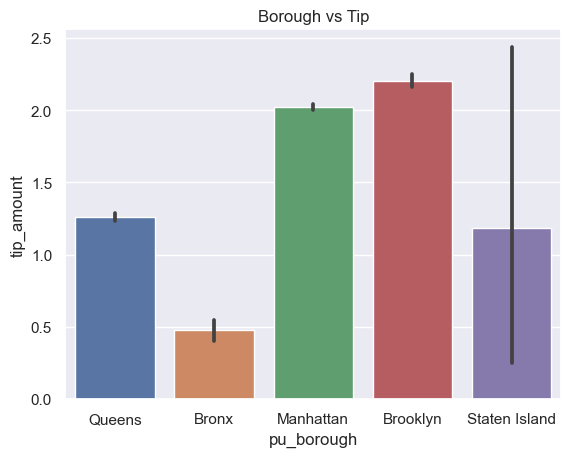

In [144]:
sns.barplot(data= df, x= 'pu_borough', y= 'tip_amount', estimator='mean')
plt.title('Borough vs Tip')

- Barplot diatas menunjukkan bahwa tip amount pu borough Brooklyn yang terbesar secara rat-rata nya 

In [145]:
df.isna().sum()

pu_loc                0
do_loc                0
pu_datetime           0
do_datetime           0
trip_distance         0
pu_day                0
do_day                0
pu_hour               0
do_hour               0
duration              0
dur_seconds           0
speed_mph             0
fare_amount           0
extra                 0
mta_tax               0
tip_amount            0
tolls_amount          0
improve_sur           0
congest_sur           0
total_amount          0
payment_type          0
trip_type             0
passenger_count       0
ratecode              0
pu_borough            0
pu_zone               0
do_borough            0
do_zone            1504
dtype: int64

### **5.2 Trip Count Analysis**

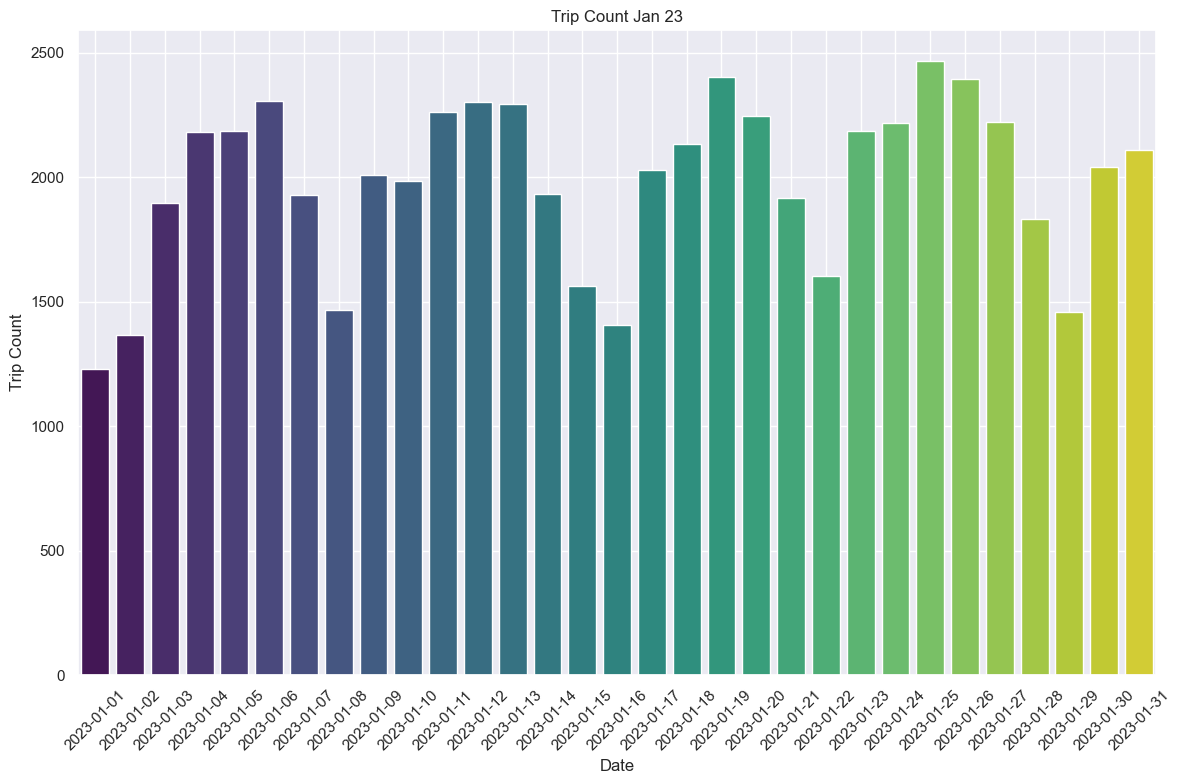

In [146]:
# 'date_only' column
df['date_only'] = df['pu_datetime'].dt.date

# Group by cohorts and calculate trip counts
cohort_passenger_counts = df.groupby('date_only')['trip_type'].count().reset_index()

# Plotting distribution of trip counts over cohorts using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='date_only', y='trip_type', data=cohort_passenger_counts, palette='viridis')
plt.title('Trip Count Jan 23')
plt.xlabel('Date')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.grid(True)

# Show visualization
plt.tight_layout()
plt.show()

Berdasarkan tampilan jumlah perjalanan tersebut diatas, terlihat distribusi jumlah perjalanan dimasing-masing hari di bulan Januari, dimana hari minggu merupakan hari dengan jumlah trip terendah.

Hal ini dikarenakan minggu merupakan hari libur kerja, sehingga aktivitas dikota Newyork relatif lebih rendah jika dibandingkan dengan hari kerja

Terdapat beberapa peluang yang muncul dari temuan data tsb :

1. Perusahaan dapat menentukan besaran / kisaran jumlah taxi yang dioperasionalkan (terutama pada hari kerja), untuk mengantisipasi kebutuhan customer

2. Perusahaan dapat memberikan program (stimulus) untuk 



### **5.3 Trip Distance Analysis**

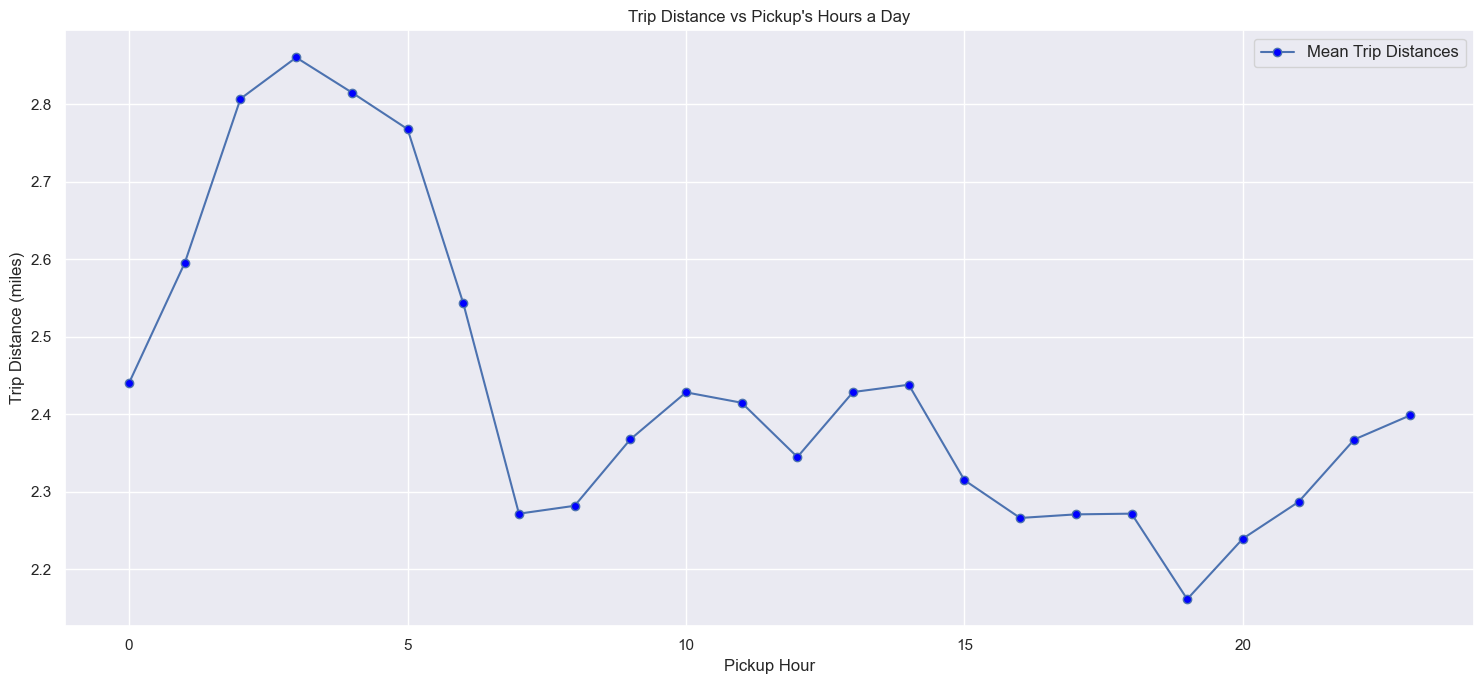

In [147]:
# Calculate mean trip distance for each pickup hour
pu = df.groupby(by='pu_hour', as_index=False)['trip_distance'].mean()

# Plotting Trip Distance vs Pickup's Hours a Day
plt.figure(figsize=(15, 7))
plt.plot(pu['pu_hour'], pu['trip_distance'], marker='o', markerfacecolor='blue', label='Mean Trip Distances')
plt.title("Trip Distance vs Pickup's Hours a Day")
plt.xlabel("Pickup Hour")
plt.ylabel('Trip Distance (miles)')
plt.legend(loc='best', fontsize=12)
plt.grid(True)

# Show visualization
plt.tight_layout()
plt.show()

Dari gambar di atas, kita dapat melihat bahwa trip distance yang dikelompokkan berdasarkan jam :

- Rata- rata perjalanan terjauh terjadi dijam 3 sampai 6

- trip distance terlihat pendek dijam 16 sampai jam 22 malam 

In [148]:
df['pu_borough'].unique()

array(['Queens', 'Bronx', 'Manhattan', 'Brooklyn', 'Staten Island'],
      dtype=object)

### **5.4 Trip Count vs pu_location Analysis**

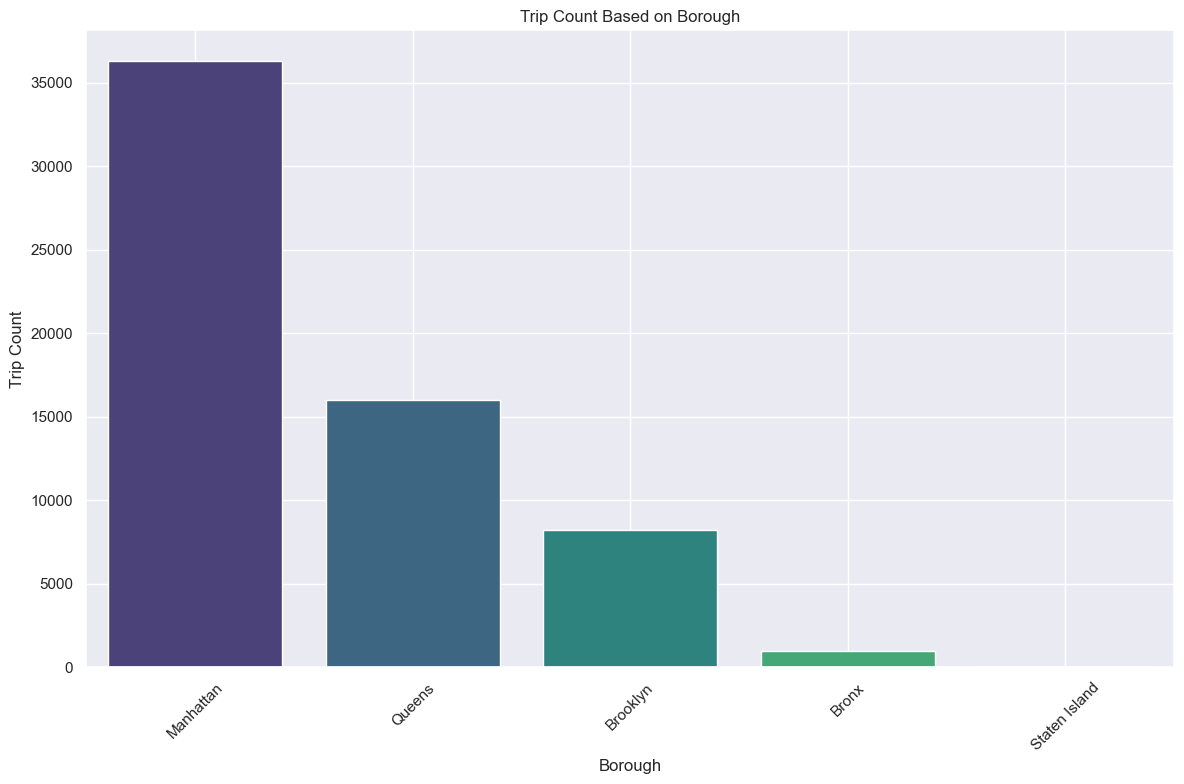

In [149]:
# Group by cohorts and calculate average passenger count
cohort_passenger_counts = df.groupby('pu_borough')['trip_type'].count().reset_index()
sorted_counts = cohort_passenger_counts.sort_values(by='trip_type', ascending=False)

# Plotting Distribution of Passenger Counts Over Cohorts using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='pu_borough', y='trip_type', data=sorted_counts, palette='viridis')
plt.title('Trip Count Based on Borough')
plt.xlabel('Borough')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.grid(True)

# Show visualization
plt.tight_layout()
plt.show()

# **5. Conclusion and Recomendation**

**Conclusion**

Berdasarkan analisis data diatas, kesimpulan yang dapat diambil adalah : 

- Jumlah perjalanan taxi mengalami fluktuatif disetiap harinya, terutama di hari minggu menjadi hari dengan jumlah perjalanan terendah. Hari kerja merupakan puncak penggunaan taxi oleh masyarakat. 

- Melihat data yang ada, mayoritas perjalanan taksi merupakan short trip (terutama setelah pukul 6 pagi sampai dengan pukul 22) 

- Secara kuantitas pendapatan TLC weekdays lebih tinggi dibandingkan weekend khususnya pada hari selasa, hal ini dipengaruhi oleh meningkatnya trip dimulai dari jam **3 sore** hingga sekitar jam **7 malam**, yang dimana jam tersebut merupakan rush hour dan tipe perjalanannya pendek. 

- Manhattan menjadi borough dengan penggunaan taxi yang paling sering (hal ini didasarkan pada jumlah perkantoran yang terdapat di daerah tsb), kemudian diikuti borough quuens dan brooklyn

- Brooklyn menjadi daerah yang penumpangnya sering memberikan tip ketika perjalanan telah selesai. Tertinggi yang kedua adalah Manhattan. Secara total trip Brooklyn berada di urutan ketiga setelah Manhattan dan Queens. 

- Perjalanan jauh maupun pendek tidak mempengaruhi penumpang dalam tipping. Pendekatan borough adalah salah satu upaya driver untuk mendapatkan penumpang yang royal

**Recomendation**

- Perusahaan harus dapat menyediakan armada yang siap pakai (disiasati dengan tersebar), terutama pada kondisi pagi hari jam 6 sampai dengan malam jam 22, mengingat potensi yang sangat besar

- Manhattan menjadi borough potensi terbesar , baik secara jumlah perjalanan, tip yang diberikan , dan dengan jarak yang perjalanan pendek

- Standardisasi pelayanan kepada customer menjadi faktor utama bagi para driver, guna menarik simpati sehingga mau untuk memberikan tambahan tip

- Sangat dimungkinkan untuk perusahaan menjadikan jasa taxinya, tidak hanya untuk pengangkutan penumpang, namun juga sebagai jasa pengiriman barang (new line business)

## **6. Export Clean Datatype into CSV**

In [153]:
# Export Data that is already cleaned to be analysed in further visualization
df.to_csv('NYC_TLC_Trip_Record_Cleaned.csv', index=False)